<a href="https://colab.research.google.com/github/sathya0525/sathya5/blob/main/True_and_fake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import numpy as np
import pandas as pd
#importing libraries for import data

In [77]:
Test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True and Fake News Prediction/test.csv')

In [78]:
Train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True and Fake News Prediction/train.csv')

# DATA STRUCTURE AND CONTENT

In [79]:
Train.shape
# it explains how many rows and coloumns in the data

(20800, 5)

In [80]:
Test.shape
# it explains how many rows and coloumns in the data

(5200, 4)

In [81]:
Train.info()
# to get the overall information about the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [82]:
Train.isnull().sum()
# to get the sum of the train

,0
id,0
title,558
author,1957
text,39
label,0


In [83]:
Train.describe()
# the description of train textset

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [84]:
Train.head()
# the first n of the rows and columns


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [85]:
Test.info()
# to get the overall information about the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [86]:
Test.isnull().sum()
# to get the sum of the train

,0
id,0
title,122
author,503
text,7


In [87]:
Test.describe()
# the description of train textset

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [88]:
Test.head()
# the first n of the rows and columns

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Text preprocessing

1. Removing the null values

In [89]:
Train=Train.fillna(' ')
# is for use removing null  values

In [90]:
Train.isnull().sum()
# to get the sum of the train by removing null values

,0
id,0
title,0
author,0
text,0
label,0


In [91]:
Test=Test.fillna(' ')
# is for use removing null  values

In [92]:
Test.isnull().sum()
# to get the sum of the train by removing null values

,0
id,0
title,0
author,0
text,0


In [93]:
Train['subject']=Train['author'] + '' + Train['title']
# we add the author and title  and store in subject


In [94]:
Train.head()
# the first n of the rows and columns

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [95]:
Test['subject']=Test['author'] + '' + Test['title']
# we add the author and title  and store in subject

In [96]:
Test.head()
 # the first n of the rows and columns

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists n...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...


# Tokenization

To separate the Words in the Sentence

In [97]:
import nltk
nltk.download('punkt')
# import the natural language preprocessing for Text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
!pip install nltk # Make sure NLTK is installed
import nltk
nltk.download('punkt') # Download the 'punkt' resource
from nltk.tokenize import word_tokenize
Train['tokens'] = Train['subject'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
Train.head()
# the first n of the rows and columns

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [100]:
import nltk
nltk.download('punkt')
# import the natural language preprocessing for Text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [101]:
!pip install nltk # Make sure NLTK is installed
import nltk
nltk.download('punkt') # Download the 'punkt' resource
from nltk.tokenize import word_tokenize
Test['tokens'] = Test['subject'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [102]:
Test.head()
# the first n of the rows and columns

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...,"[David, StreitfeldSpecter, of, Trump, Loosens,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists n...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...,"[Daniel, VictorTim, Tebow, Will, Attempt, Anot..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...,"[Truth, Broadcast, NetworkKeiser, Report, :, M..."


# lowering the case text

In [103]:
Train['tokens']=Train['subject'].str.lower()
# it removes the capital letters into small and add lower cases




In [104]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,darrell lucushouse dem aide: we didn’t even se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","daniel j. flynnflynn: hillary clinton, big wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,consortiumnews.comwhy the truth might get you ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,jessica purkiss15 civilians killed in single u...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,howard portnoyiranian woman jailed for fiction...


In [105]:
Test['tokens']=Test['subject'].str.lower()
# it removes the capital letters into small and add lower cases




In [106]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...,david streitfeldspecter of trump loosens tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists n...,russian warships ready to strike terrorists n...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...,common dreams#nodapl: native american leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...,daniel victortim tebow will attempt another co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...,truth broadcast networkkeiser report: meme war...


Removal of punctuation

In [107]:
Train['subject']=Train['subject'].str.replace('[^\w\s]','')
# is removing the punctuation mark is make for machine learning



In [108]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,darrell lucushouse dem aide: we didn’t even se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","daniel j. flynnflynn: hillary clinton, big wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,consortiumnews.comwhy the truth might get you ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,jessica purkiss15 civilians killed in single u...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,howard portnoyiranian woman jailed for fiction...


In [109]:
Test['subject']=Test['subject'].str.replace('[^\w\s]','')
# is removing the punctuation mark is make for machine learning



In [110]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...,david streitfeldspecter of trump loosens tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists n...,russian warships ready to strike terrorists n...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...,common dreams#nodapl: native american leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...,daniel victortim tebow will attempt another co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...,truth broadcast networkkeiser report: meme war...


Removal of stop words

In [111]:
nltk.download('stopwords')
# Downloading the stopwords that are present in English Langugae

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
from nltk.corpus import stopwords

In [113]:
sw=set(stopwords.words('english'))
print(sw)
# Showcasing the stopwords in English

{'your', 'having', 'after', 'them', 'other', 'mightn', 'o', 'y', "mustn't", 'than', "hadn't", 'into', 'will', 'but', 'doing', 'if', 'being', 'an', 'then', 'you', "you're", 'which', 'over', 're', 'because', "wouldn't", 'd', "couldn't", 'with', 'myself', 'her', 'there', 'yours', 'my', 'few', 'of', 'now', 'm', "you've", 'above', 'ma', 'wasn', 'wouldn', 'below', 'when', 'those', 'aren', 'again', 'been', 'll', "hasn't", 'i', 'do', 'theirs', 'whom', 'yourselves', 'weren', "shan't", "shouldn't", 'about', 'did', 'this', 'herself', 'here', 'where', 'at', "that'll", 'itself', 'our', 'himself', 'any', 'couldn', "you'd", "doesn't", 'doesn', 'not', 'hadn', "should've", 'through', 'own', 'same', 'he', 'their', 'until', "it's", 'just', 'don', 'on', 'are', "needn't", "isn't", 'we', "you'll", 'from', "weren't", 'hasn', 'some', 'by', 'for', 'ain', "aren't", 'its', 'up', 'that', 'or', "won't", "wasn't", 'ourselves', 's', 'a', 't', 'shouldn', 'him', 'most', 'no', 'yourself', 'nor', 'and', 'was', 'all', "d

In [114]:
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the SW stopword set.

In [115]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,darrell lucushouse dem aide: we didn’t even se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","daniel j. flynnflynn: hillary clinton, big wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy Truth Might Get You Fired,consortiumnews.comwhy the truth might get you ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,jessica purkiss15 civilians killed in single u...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed fictional u...,howard portnoyiranian woman jailed for fiction...


In [116]:
nltk.download('stopwords')
# Downloading the stopwords that are present in English Langugae

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
from nltk.corpus import stopwords

In [118]:
sw=set(stopwords.words('english'))
print(sw)
# Showcasing the stopwords in English

{'your', 'having', 'after', 'them', 'other', 'mightn', 'o', 'y', "mustn't", 'than', "hadn't", 'into', 'will', 'but', 'doing', 'if', 'being', 'an', 'then', 'you', "you're", 'which', 'over', 're', 'because', "wouldn't", 'd', "couldn't", 'with', 'myself', 'her', 'there', 'yours', 'my', 'few', 'of', 'now', 'm', "you've", 'above', 'ma', 'wasn', 'wouldn', 'below', 'when', 'those', 'aren', 'again', 'been', 'll', "hasn't", 'i', 'do', 'theirs', 'whom', 'yourselves', 'weren', "shan't", "shouldn't", 'about', 'did', 'this', 'herself', 'here', 'where', 'at', "that'll", 'itself', 'our', 'himself', 'any', 'couldn', "you'd", "doesn't", 'doesn', 'not', 'hadn', "should've", 'through', 'own', 'same', 'he', 'their', 'until', "it's", 'just', 'don', 'on', 'are', "needn't", "isn't", 'we', "you'll", 'from', "weren't", 'hasn', 'some', 'by', 'for', 'ain', "aren't", 'its', 'up', 'that', 'or', "won't", "wasn't", 'ourselves', 's', 'a', 't', 'shouldn', 'him', 'most', 'no', 'yourself', 'nor', 'and', 'was', 'all', "d

In [119]:
Test['subject'] = Test['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the SW stopword set.

In [120]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","David StreitfeldSpecter Trump Loosens Tongues,...",david streitfeldspecter of trump loosens tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready strike terrorists near ...,russian warships ready to strike terrorists n...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...,common dreams#nodapl: native american leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...,daniel victortim tebow will attempt another co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...,truth broadcast networkkeiser report: meme war...


stemming the limitisation

In [121]:
from nltk.stem  import PorterStemmer

In [122]:
stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization :     stemmer = PorterStemmer()
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [123]:
Train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucushous dem aide: we didn’t even see ...,darrell lucushouse dem aide: we didn’t even se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillari clinton, big wom...","daniel j. flynnflynn: hillary clinton, big wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhi truth might get you fire,consortiumnews.comwhy the truth might get you ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilian kill in singl us ai...,jessica purkiss15 civilians killed in single u...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jail fiction unpub...,howard portnoyiranian woman jailed for fiction...


In [124]:
from nltk.stem  import PorterStemmer

In [125]:
stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization :     stemmer = PorterStemmer()
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [126]:
Test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","David StreitfeldSpecter Trump Loosens Tongues,...",david streitfeldspecter of trump loosens tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready strike terrorists near ...,russian warships ready to strike terrorists n...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...,common dreams#nodapl: native american leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...,daniel victortim tebow will attempt another co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...,truth broadcast networkkeiser report: meme war...


# vectorisation

In [127]:
x=Train['subject']
y=Train['label']
# th Subject are


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [129]:
vt=TfidfVectorizer()
vt.fit(x)
#we use this library for vectorize the given text form

TfidfVectorizer()

In [130]:
x.head()

,subject
0,darrel lucush dem aide: we didn’t even see com...
1,"daniel j. flynnflynn: hillari clinton, big wom..."
2,consortiumnews.comwhi truth might get you fire
3,jessica purkiss15 civilian kill in singl us ai...
4,howard portnoyiranian woman jail fiction unpub...


In [131]:
x=vt.transform(x)
#tranform the text into data


In [132]:
print(x)

  (0, 31128)	0.18699888924458613
  (0, 30262)	0.2776027732834777
  (0, 29915)	0.2512808541494457
  (0, 25864)	0.21975821872832688
  (0, 17237)	0.36837958873467835
  (0, 16726)	0.24992443496479297
  (0, 14823)	0.2108858595431237
  (0, 14615)	0.15502698169971413
  (0, 9477)	0.19815662616146779
  (0, 7750)	0.2519787565152592
  (0, 7453)	0.246741751256408
  (0, 7112)	0.3039822438189489
  (0, 5981)	0.21179580289281727
  (0, 5111)	0.3105350341795275
  (0, 1088)	0.33544732783862846
  (1, 31761)	0.3697872989088357
  (1, 13138)	0.25285168767185423
  (1, 10365)	0.5268164226435469
  (1, 7053)	0.31888871084479553
  (1, 5717)	0.23432931603021007
  (1, 4714)	0.450403390641861
  (1, 4064)	0.1868623738195069
  (1, 3340)	0.3569409406802066
  (2, 32126)	0.2742248291030988
  (2, 29803)	0.35231330356872237
  :	:
  (20797, 23369)	0.24637384821564637
  (20797, 19946)	0.07780532927160033
  (20797, 18641)	0.17586080006170937
  (20797, 18536)	0.3190249980037814
  (20797, 16222)	0.2243210589289706
  (20797, 145

In [133]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [134]:


# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [135]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

# ModelBuilding

In [136]:
modal=LogisticRegression()
#Logistic Regression is call as Model



In [137]:
modal.fit(xTrain,yTrain)
# Fit the model of traing dataset


LogisticRegression()

In [138]:
ytrpredict=modal.predict(xTrain)
# the training input is placed in the var y_pred


In [139]:
accuracy =accuracy_score(yTrain,ytrpredict)
precision = precision_score(yTrain, ytrpredict)
recall = recall_score(yTrain, ytrpredict)
f1 = f1_score(yTrain, ytrpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)

 Training Accuracy: 0.9729567307692307
 Training Precision: 0.9532903819604234
 Training Recall: 0.994717887154862
Training F1 Score: 0.9735636235459992


In [140]:
yttpredict=modal.predict(xTest)

In [141]:
accuracy =accuracy_score(yTest,yttpredict)
precision = precision_score(yTest, yttpredict)
recall = recall_score(yTest, yttpredict)
f1 = f1_score(yTest, yttpredict)

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:', f1)

 Testing Accuracy: 0.9533653846153847
 Testing Precision: 0.9210878288007134
 Testing Recall: 0.9918386941910706
Testing F1 Score: 0.9551548774849746


true positive

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

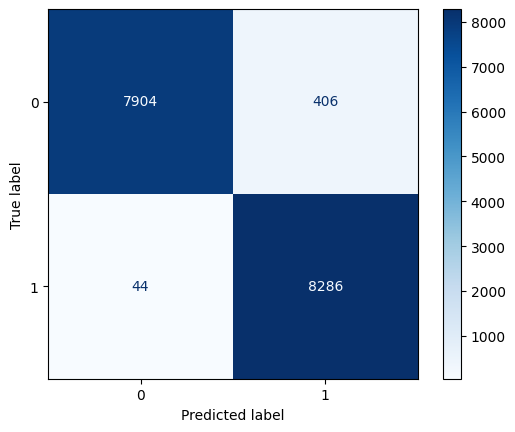

In [143]:
# Generate the confusion matrix
cm = confusion_matrix(yTrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

7890 point have been predicted as false positive
8280 point have been predicted as true negative
50 numbers has been wrongly predicted as true positive
418 numbers has been wrongly predicted as false negative

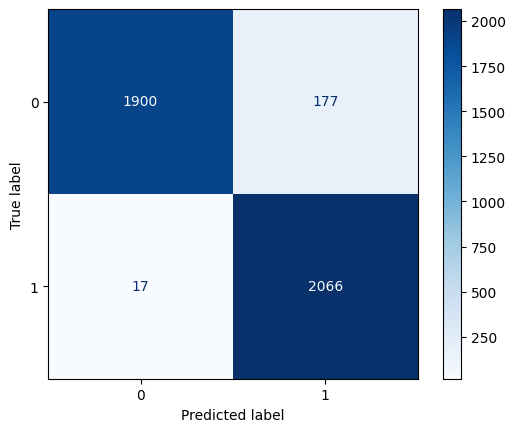

In [144]:
# Generate the confusion matrix
cm = confusion_matrix(yTest,yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

1893 point have been predicted as false positive
2061 point have been predicted as true negative
22 numbers has been wrongly predicted as true positive
184 numbers has been wrongly predicted as false negative

false positive

In [145]:
import pickle
# to saving all project


In [146]:
lr=LogisticRegression


In [147]:
prediction="newsprediction.sav"
pickle.dump(lr,open(prediction,'wb'))